# Homework 1: Algorithms for DNA sequencing

In [1]:
seq_dict={}
with open('lambda_virus.fa','r') as f:
    for r in f.readlines():
        if r[0]=='>':
            name=r
            seq=''
        else:
            seq=seq+r.rstrip()
    seq_dict[name]=seq
            

In [2]:
def reverse_complement(seq):
    complementary_seq=''
    complement={'A':'T','T':'A','G':'C','C':'G'}
    for s in seq:
        complementary_seq=complement[s]+complementary_seq
    return complementary_seq

In [3]:
reverse_complement('AGGT')

'ACCT'

In [4]:
def naive_comparison(pattern,text):
    occurances=[]
    for t in range(len(text)-len(pattern)+1):
        match=True
        for p in range(len(pattern)):
            if text[p+t]!=pattern[p]:
                match=False
                break
        if match==True:
            occurances.append(t) # record the index in t where p matches
    return list(set(occurances)) #also return whether a match was present or not

Q1. How many times does <b>AGGT</b> or its reverse complement <b>ACCT</b> occur in the lambda virus genome?  E.g. if <b>AGGT</b> occurs 10 times and <b>ACCT</b> occurs 12 times, you should report 22.

#### Alternate Solution 1:

In [5]:
seqs=naive_comparison('ACCT',seq)
rev_seqs=naive_comparison('AGGT',seq) # Since ACCT and AGGT are not the same, we can directly sum the two counts
print('Total number of occurances:', len(seqs)+len(rev_seqs))

Total number of occurances: 306


#### Alternate Solution 2:

In [6]:
def naive_reverse_comparison(pattern,text):
    occurances=[]
    occurances_rev=[]
    reverse_pattern=reverse_complement(pattern)
    for t in range(len(text)-len(pattern)+1):
        match_fw=True
        match_bw=True
        for p in range(len(pattern)):
            if text[t+p]!=pattern[p]:
                match_fw=False
                break
        if match_fw:
            occurances.append(t)
        if reverse_pattern!=pattern:
            for rp in range(len(reverse_pattern)):
                if text[t+rp]!=reverse_pattern[rp]:
                    match_bw=False
                    break
            if match_bw:
                    occurances.append(t)
    return occurances      
        

In [7]:
match_occurances2=naive_reverse_comparison('AGGT',seq)

In [8]:
print('Total number of occurances:', len(match_occurances2))

Total number of occurances: 306


#### Q2. How many times does TTAA or its reverse complement occur in the lambda virus genome? 

<b>Alternate Solution 1:

In [9]:
print(reverse_complement('TTAA'))

TTAA


Since the reverse complement of 'TTAA' is 'TTAA', we need can run the naive_comparison() function for 'TTAA' only once

In [10]:
print(len(naive_comparison('TTAA',seq)))

195


<b> Alternate solution 2: </b> Use the naive_reverse_comparison() function

In [11]:
print(len(naive_reverse_comparison('TTAA',seq)))

195


#### Q3. What is the offset of the leftmost occurrence of ACTAAGT or its reverse complement in the Lambda virus genome?  

In [12]:
print(min(seq.index('ACTAAGT'),seq.index(reverse_complement('ACTAAGT'))))  #seq.index finds the first / left-most occurence of the text 

26028


In [13]:
print(min(naive_comparison('ACTAAGT',seq)[0],naive_comparison(reverse_complement('ACTAAGT'),seq)[0]))

26028


In [14]:
print(naive_reverse_comparison('ACTAAGT',seq)[0])

26028


#### Q4. What is the offset of the leftmost occurrence of AGTCGA or its reverse complement in the Lambda virus genome?

In [15]:
print(min(seq.index('AGTCGA'),seq.index(reverse_complement('AGTCGA'))))  #seq.index finds the first / left-most occurence of the text 

450


In [16]:
print(min(naive_comparison('AGTCGA',seq)[0],naive_comparison(reverse_complement('AGTCGA'),seq)[0]))

450


In [17]:
print(naive_reverse_comparison('AGTCGA',seq)[0])

450


#### Q5. How many times does TTCAAGCC occur in the Lambda virus genome when allowing up to 2 mismatches? 

In [18]:
def naive_2mm(pattern, text):
    count_m=[]
    for t in range(len(text)-len(pattern)+1):
        match=True
        miscount=0
        for p in range(len(pattern)):
            if text[t+p]!=pattern[p]:
                miscount+=1
                if miscount>2:
                    match=False
                    break
        if match:
            count_m.append(t)
    return count_m

In [19]:
### Test from sample notebook provided
p = 'CTGT'
ten_as = 'AAAAAAAAAA'
t = ten_as + 'CTGT' + ten_as + 'CTTT' + ten_as + 'CGGG' + ten_as
print(t)
occurrences = naive_2mm(p, t)
print(occurrences)

AAAAAAAAAACTGTAAAAAAAAAACTTTAAAAAAAAAACGGGAAAAAAAAAA
[10, 24, 38]


In [20]:
occurrences = naive_2mm('TTCAAGCC', seq)

In [21]:
len(occurrences)

191

#### Q6. What is the offset of the leftmost occurrence of AGGAGGTT in the Lambda virus genome when allowing up to 2 mismatches?

In [22]:
naive_2mm('AGGAGGTT', seq)[0]

49

#### Q7. Finally, download and parse the provided FASTQ file containing real DNA sequencing reads derived from a human. This dataset has something wrong with it; one of the sequencing cycles is poor quality. Report which sequencing cycle has the problem. 

In [23]:
seqa=[]
quala=[]
with open('ERR037900_1.first1000.fastq','r') as f:
    lines=f.readlines()
    for line in range(len(lines)):
        if lines[line][0]=='@':
            seqa.append(lines[line+1].rstrip())
            quala.append(lines[line+3].rstrip())
        if line==len(lines)-4:
            break

In [24]:
print(len(quala))
print(len(quala[0]))

1002
100


Hence, there are 1002 reads each of 100 bases (2 are junk reads due to some readlines() extraction. That has been cleaned out below

In [25]:
def get_score(chara): # convert the ASCII value of a score to the actual Quality score
    score = ord(chara)-33
    return score

In [26]:
r= get_score('A')
r

32

In [27]:
import numpy as np

In [29]:
for i in range(len(quala)):#identify and manually delete some of the junk rows that came up during the analysis
    flag=True
    if len(quala[i])!=100:
        print(i, len(quala[i]), quala[i])
#         del quala[i] #Use this only for the first run and then comment

In [30]:
print(f'Resultant quality score table has {len(quala)} rows and {len(quala[0])} columns')

Resultant quality score table has 1000 rows and 100 columns


In [38]:
np_test=np.array([get_score(x) for y in quala for x in y]) #Prefer to use numpy for vector and matrix operations
np_test=np_test.reshape(1000,100)

In [39]:
final=np.mean(np_test, axis=0) # A vector of 100 values each corresponding the one sequence cycle containing the average of those sequence cycles across all reads

In [40]:
final.shape

(100,)

In [41]:
import matplotlib.pyplot as plt

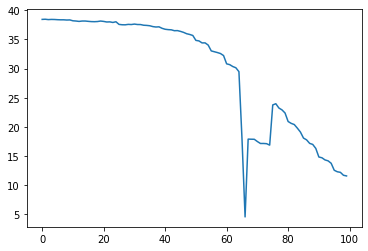

In [42]:
plt.plot(range(len(final)),final)

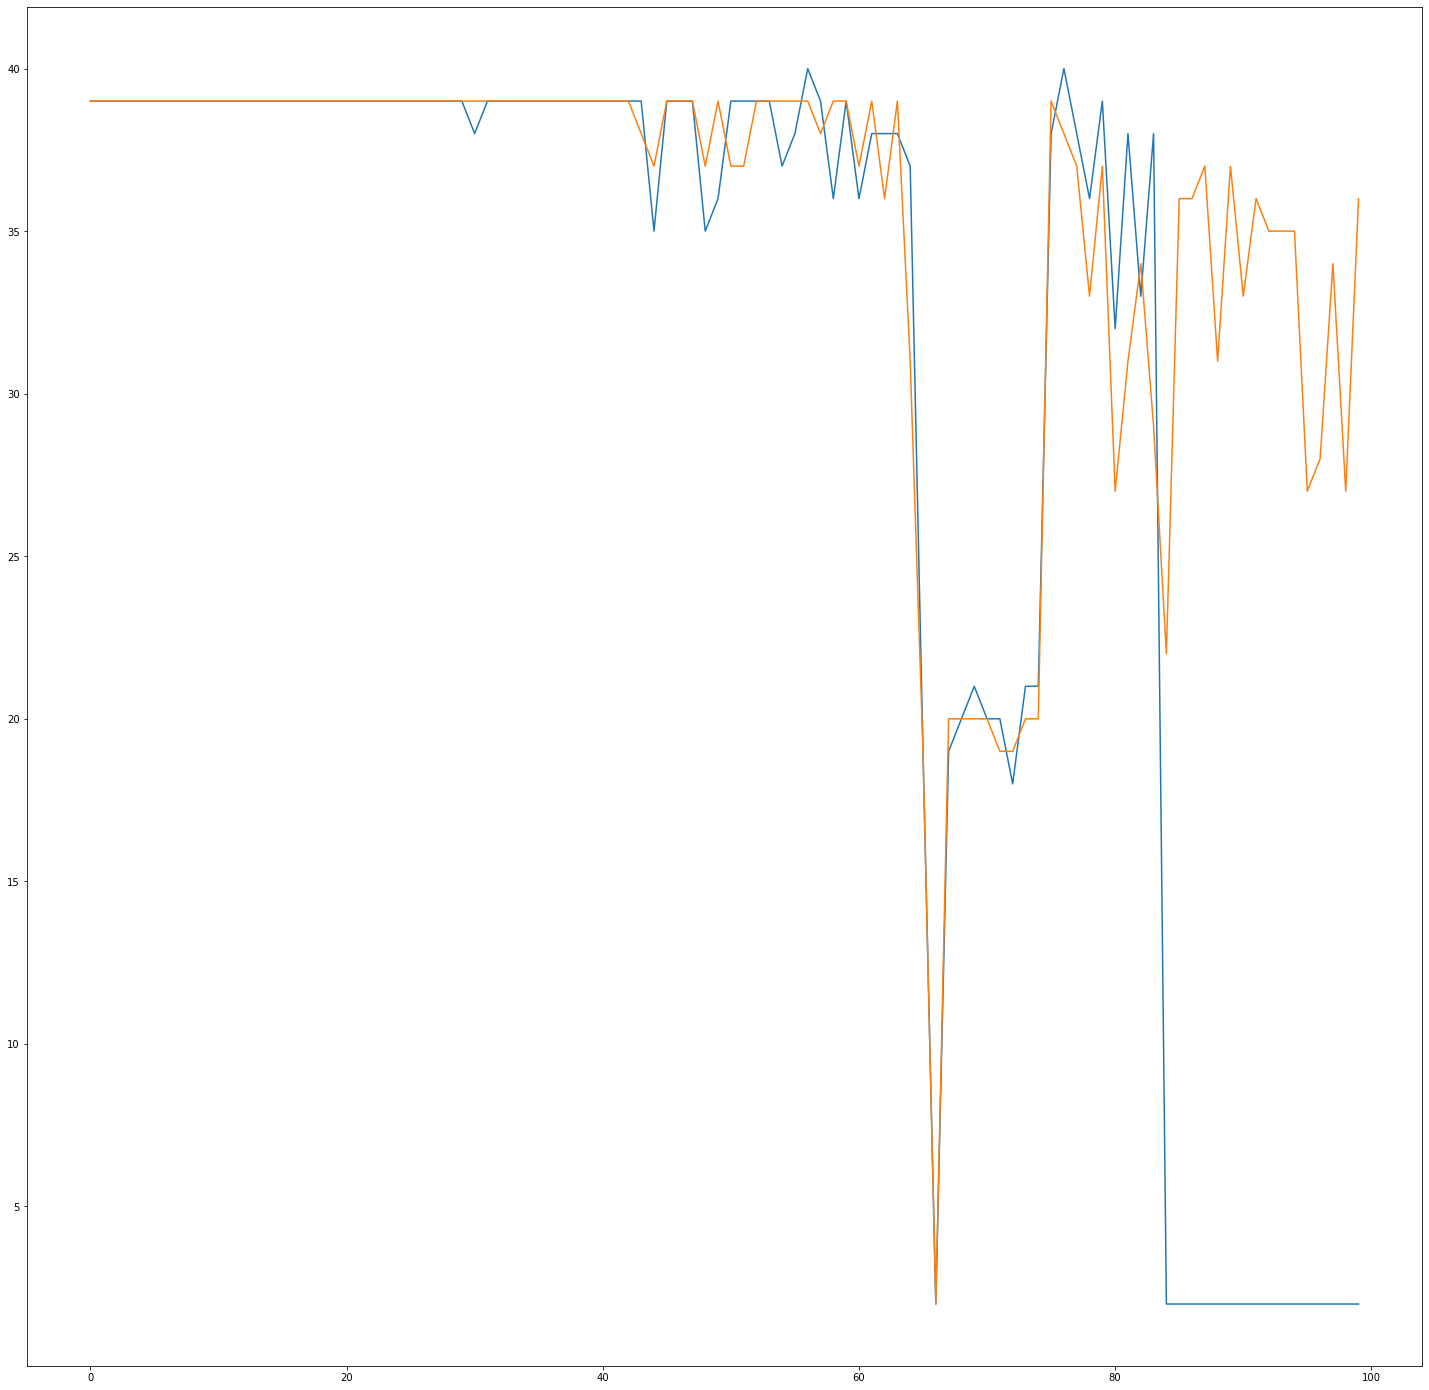

In [60]:
plt.figure(figsize=(25,25)) #For each sample, how does the quality score change over the length of the read. Color indicates each sample
plt.plot(range(100),np_test[2]); #Sample graph for the third read
plt.plot(range(100),np_test[0]); #Sample graph for the first read

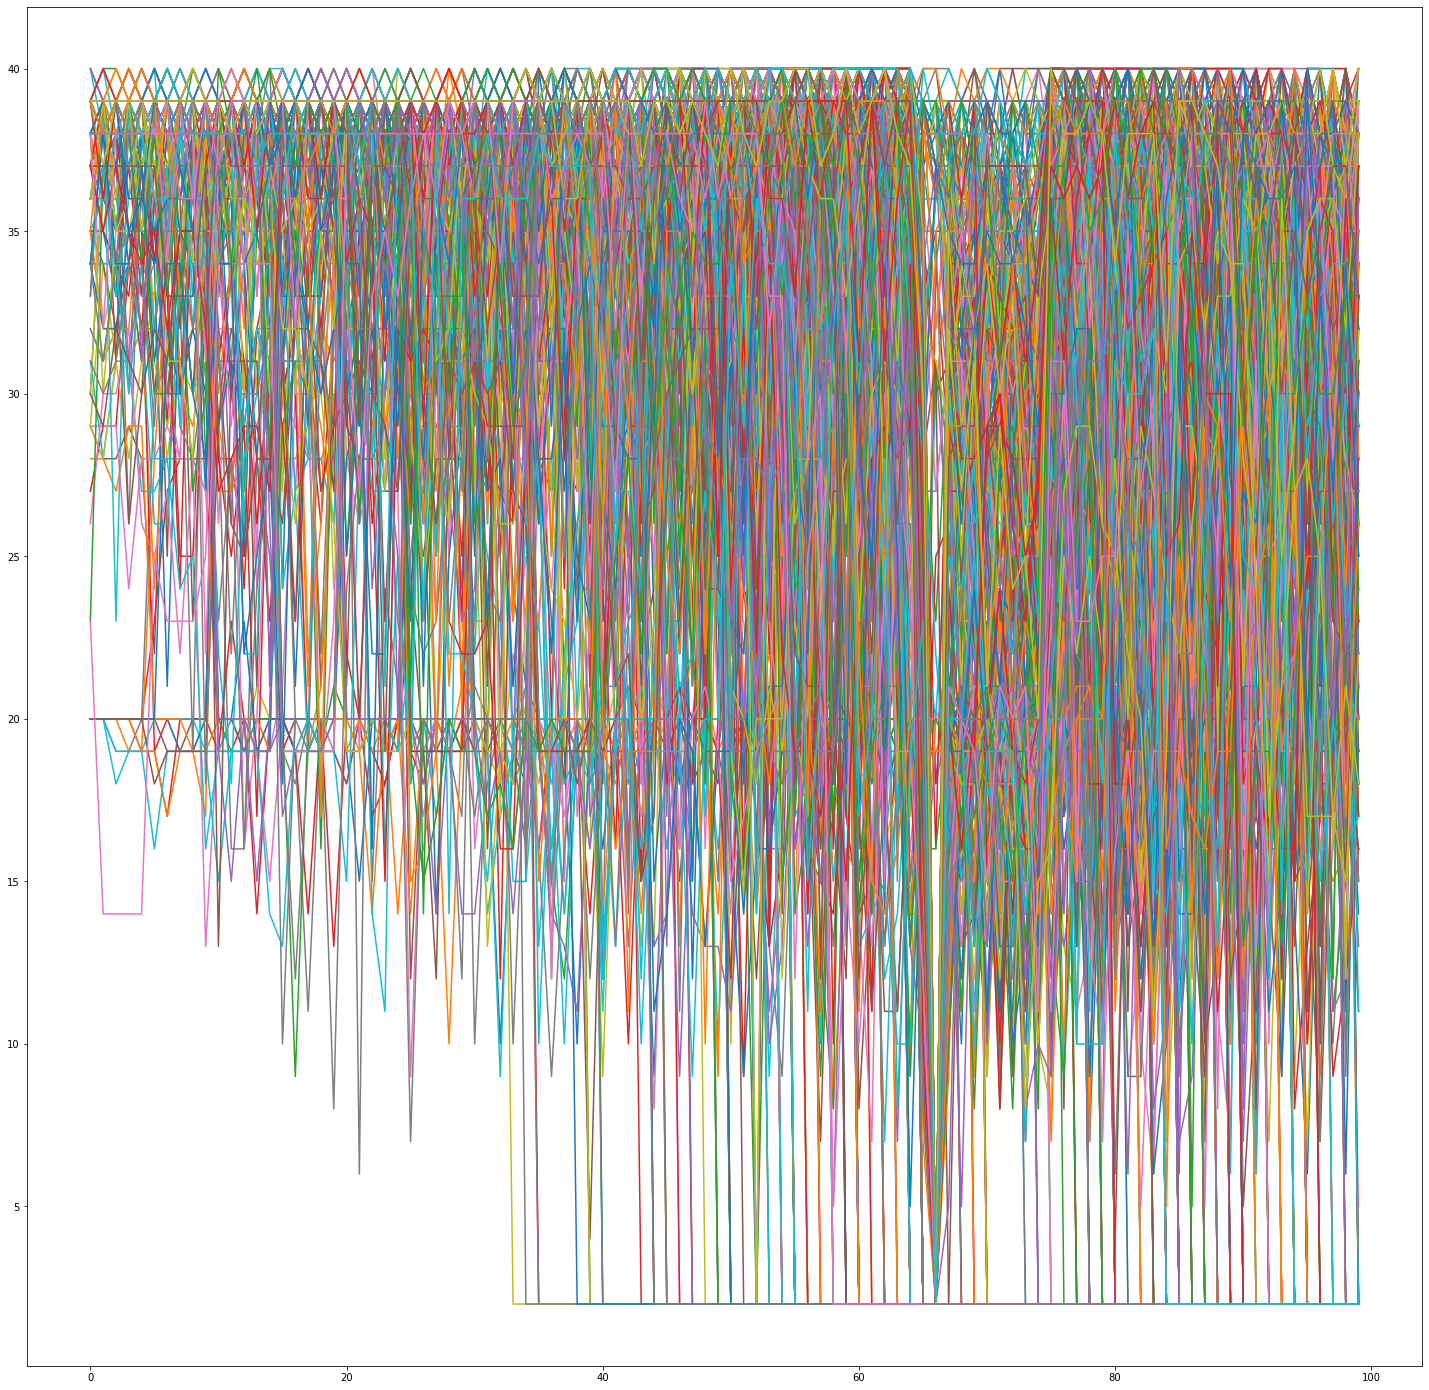

In [70]:
plt.figure(figsize=(25,25))
for i in np_test:
    plt.plot(range(len(i)),i);

In [67]:
np.min(np_test) #what is the lowest quality score available in the dataset?

2

As we can see in the graph above, there is a dense collection of values hitting the base line of 2 around 65-70. Hence, the average quality score at that point will be incredibly low

In [45]:
min(final) #lowest quality scores across all cycles

4.526

In [46]:
np.where(final==min(final)) #the offset of the sequencing cycle

(array([66], dtype=int64),)